## Seaborn Tutorial On Visualization

https://seaborn.pydata.org/tutorial.html

In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style="darkgrid")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Visualizing Statistical Relationships

The one we will use most is relplot(). This is a __figure-level__ function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two __axes-level__ functions: (__figure-level functions__ return a figure. __axes-level__ functions can operate on an existing axis.)

- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")

These functions plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of __hue, size, and style__.

### Scatterplots

In [12]:
tips = sns.load_dataset("tips")
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


For customizing palette, refer to https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette.

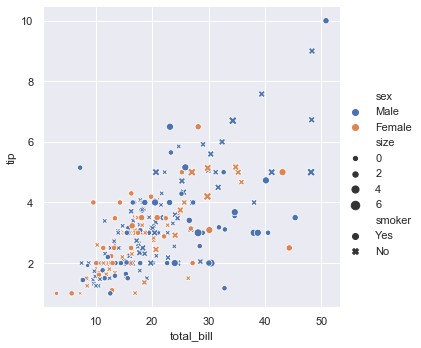

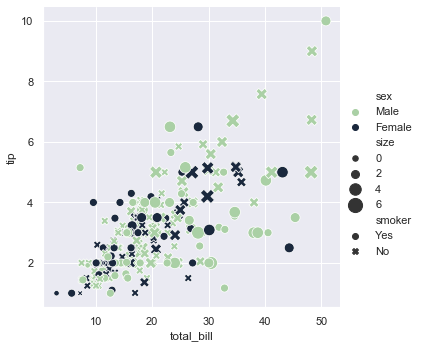

In [19]:
# Basic Faceting
sns.relplot(data=tips, x="total_bill", y="tip", style="smoker", hue="sex", size="size");
# Customizing sizes, style and palette. Refer to 
sns.relplot(data=tips, x="total_bill", y="tip", style="smoker", hue="sex", size="size", sizes=(30,200), palette="ch:r=-.5,l=.75");


### Line Plot

seaborn.axisgrid.FacetGrid

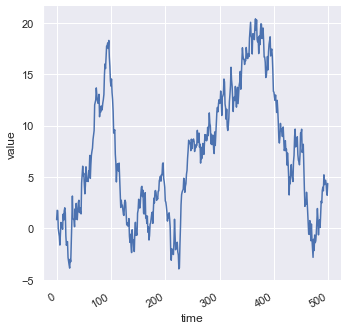

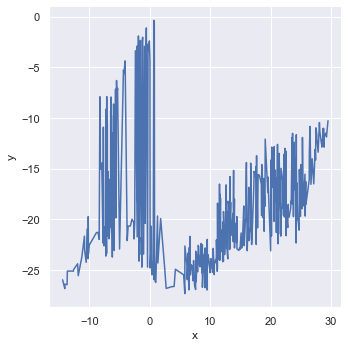

In [33]:
# Notice how kind="line" specifies the line plot. kind="scatter" by default.
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()
type(g)

# Turning sort=False can produce messy plots
df = pd.DataFrame(np.random.randn(500,2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(data=df, x="x", y="y", kind="line", sort=True)
# sns.relplot(data=df, x="x", y="y", kind="scatter", sort=True) raises an error. We don't know on which variable the sorting is based.

### Aggregation and Representing Uncertainty

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the __mean__ and the __95% confidence interval__ around the mean:

In [160]:
# At the same timepoint, there are multiple signals.
fmri = sns.load_dataset("fmri")
fmri.head(5)
fmri["timepoint"].unique()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


array([18, 14, 17,  9, 16, 15,  0, 13, 12, 11, 10,  3,  7,  8,  2,  6,  5,
        4,  1], dtype=int64)

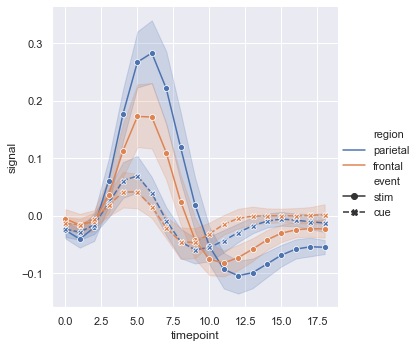

In [165]:
# By default, sns plots 95% confidence interval around the mean. CI can be turned off.
# sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);
# sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, ci=False);

# We can add facets through color and style. Marker can be added for aesthetic purpose.
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, hue="region", style="event", markers=True);

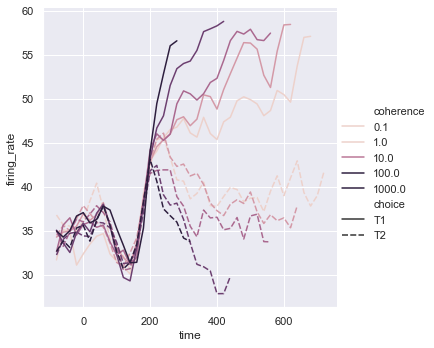

In [167]:
# When using a continous variable as hue, we can choose how we normalize the hues. hue_norm=LogNorm() normalizes that variable on a log_scale.
dots = sns.load_dataset("dots").query("align == 'dots'")
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

### Plotting with date data

g.fig.autofmt_xdate() automatically formats the date data.

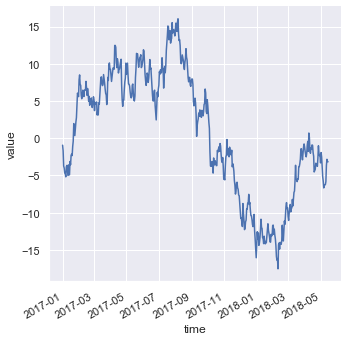

In [169]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Faceting data on multiple graphs

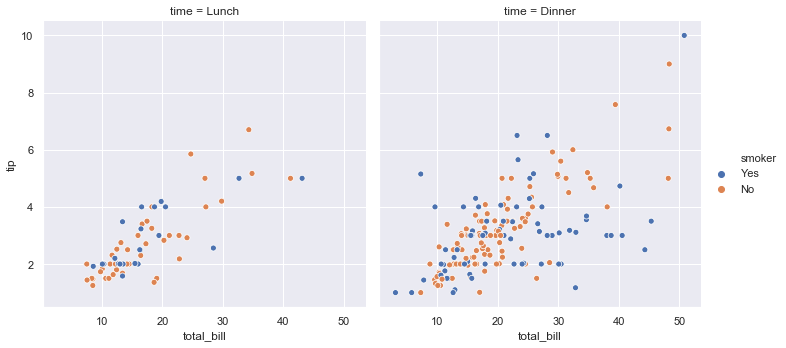

In [173]:
# Use col= or row= argument on a categorical data.
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

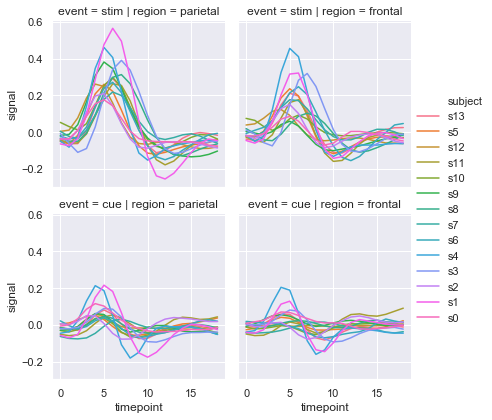

In [174]:
# col= and row= can be used in combination.
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

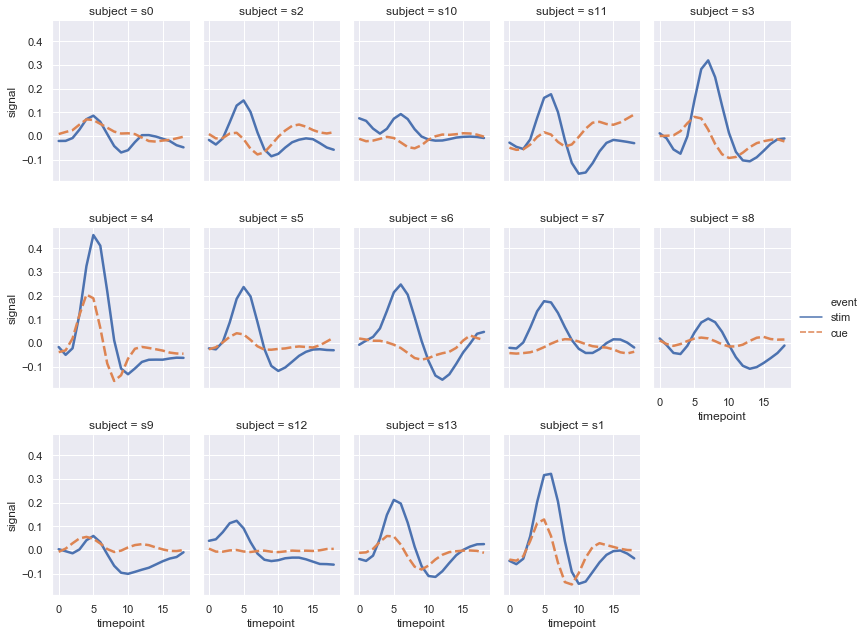

In [176]:
# col_wrap= can be used to assign the number of columns per row when faceting
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

## 2. Plotting with Categorical Variables

In the relational plot tutorial we saw how to use different visual representations to show the relationship between multiple variables in a dataset. In the examples, we focused on cases where the main relationship was between two numerical variables. If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, `catplot()`, that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

Categorical scatterplots:

- stripplot() (with kind="strip"; the default)
- swarmplot() (with kind="swarm")

Categorical distribution plots:

- boxplot() (with kind="box")
- violinplot() (with kind="violin")
- boxenplot() (with kind="boxen")

Categorical estimate plots:

- pointplot() (with kind="point")
- barplot() (with kind="bar")
- countplot() (with kind="count")

### Categorical Scatterplot

Creates a 1D scatterplot for every category. The default is a strip plot, where points are allowed to overlap. An alternative is a "swarm" plot (as in a beeswarm), where points are arranged so that they don't overlap. But the latter only works well when the data set is small.

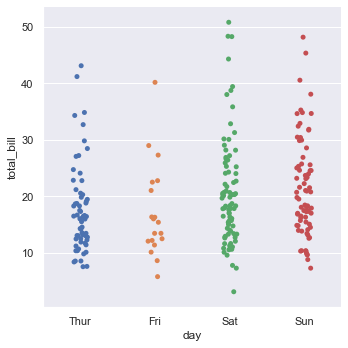

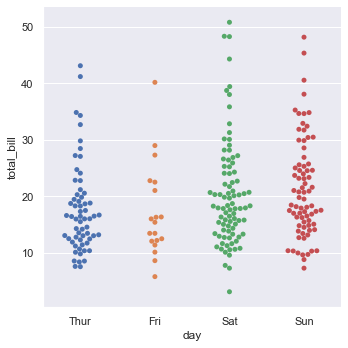

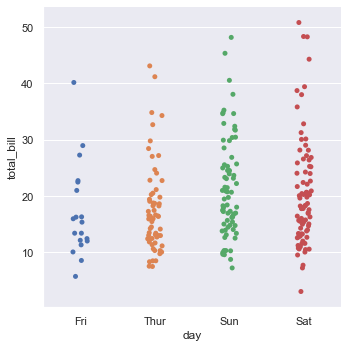

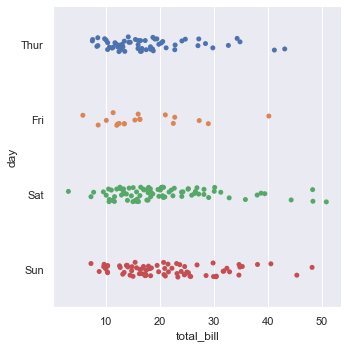

In [185]:
# The jitter= parameter is by default true. Turning it off forces everything onto a line.
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", kind="strip", data=tips, jitter=True);
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);
# You can conrol the order by specifying it through order=
sns.catplot(x="day", y="total_bill", kind="strip", data=tips, jitter=True, order=["Fri", "Thur", "Sun", "Sat"]);
# It's helpful to put categorical variable on the y-axis when the number of categories is many.
sns.catplot(x="total_bill", y="day", kind="strip", data=tips)

### Distribution of Variables Within Categories

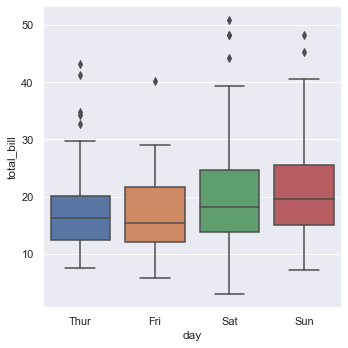

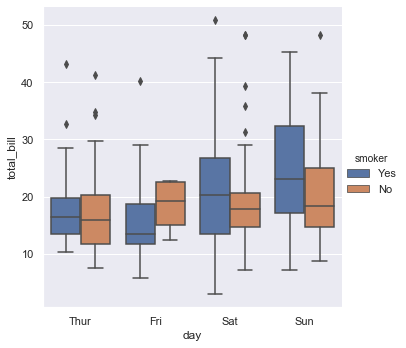

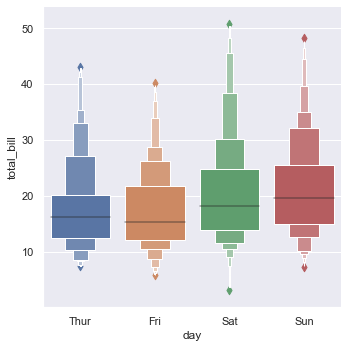

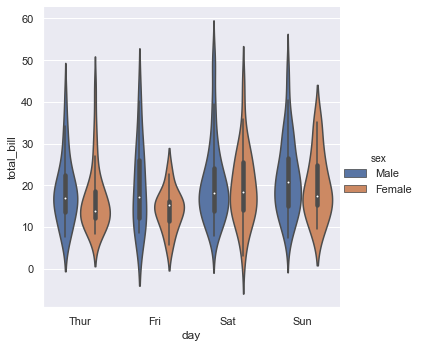

In [194]:
# boxplot according to categories
sns.catplot(x="day", y="total_bill", kind="box", data=tips);
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);
# boxenplot is boxplot optimized for information display
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips);

# diamonds = sns.load_dataset("diamonds")
# sns.catplot(x="color", y="price", kind="boxen", data=diamonds.sort_values("color"));

# violin is another alternative
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", data=tips);

Notice when we add a new plot to an existing figure, an axis level function has to be invoked.

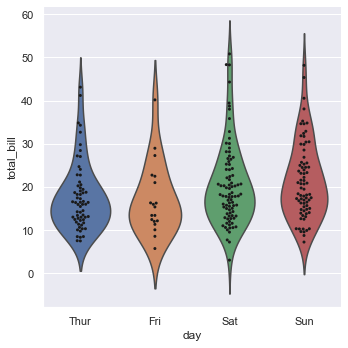

In [199]:
# Violin plot can be used in conjunction with swarm plots to get a richer summary. 
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

### Estimation and Aggregation over Categorical Variables

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (__taking the mean by default__). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

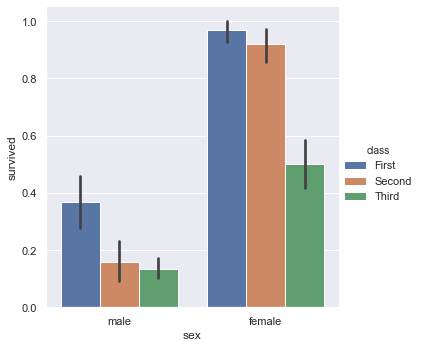

In [200]:
# kind="bar"
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

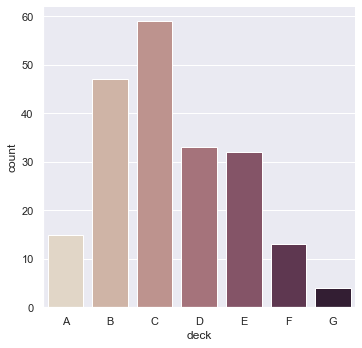

In [202]:
# kind="count"
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

When plotting "wide-form" data -- where categories are on the y-axis and numerical variables are on the x-axis, turn __orient="h"__ on.

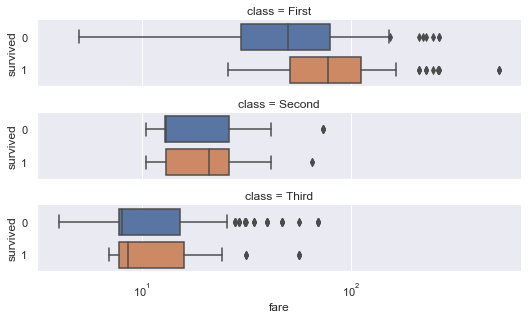

In [209]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=5,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

## 3. Plotting Distributions

### 1D histogram

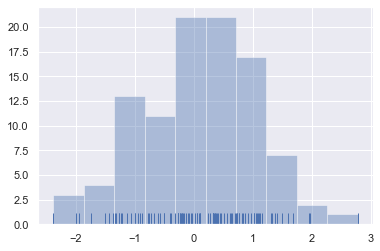

In [213]:
# The most basic 1D historgram.
x = np.random.normal(size=100)
sns.distplot(x, kde=False, rug=True);

### Kernel Density Estimation

Each observation is first replaced with a normal (Gaussian) curve centered at that value. Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1. 

Bandwidth refers to how close the kernel density fits the data. In the above example, it's the $\sigma$ of the Gaussian distribution we're using. The larger it is, the more spread out each individual pdf is, and the more smoothed-out the aggregated the entire distribution.

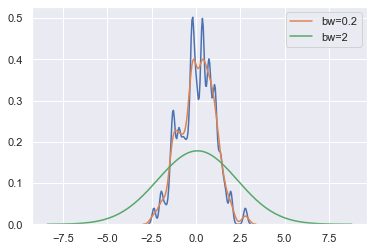

In [224]:
# effects of chaning bw
ax1 = sns.kdeplot(x, bw=0.1)
sns.kdeplot(x, bw=0.2, ax=ax1, label="bw=0.2")
sns.kdeplot(x, bw=2, ax=ax1, label="bw=2")
plt.legend();

### Fitting Parametric Distributions

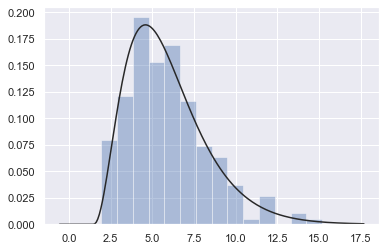

In [233]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);


### 2D histogram and KDE

Hexbin plot is the closest analogy to 2D. Invoked by kind="hex".

Text(0.5, 1, 'Hexbin Plot')

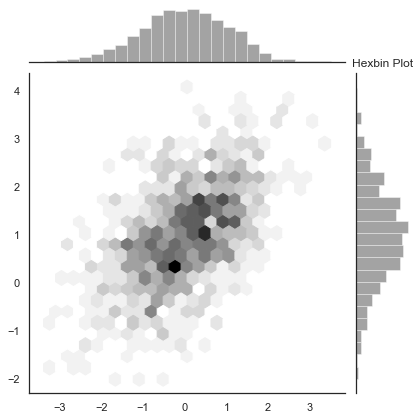

In [248]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");
plt.title("Hexbin Plot", )

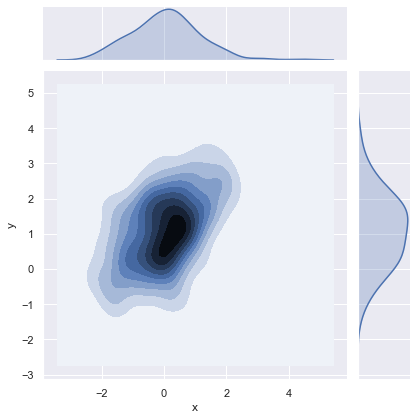

In [251]:
# Joint KDE, which looks pretty cool.
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df, kind="kde");

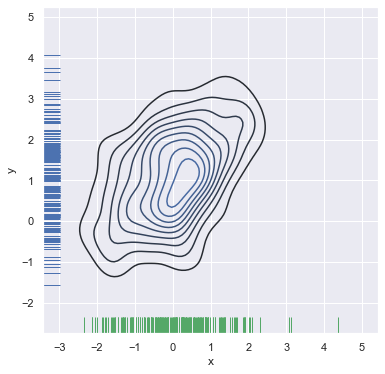

In [252]:
## This shows how axis level functions can be used in conjuction with figure level functions.
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

Refer to ?g for adding cool features.

For a jointplot, matplotlib functions have to invoked.

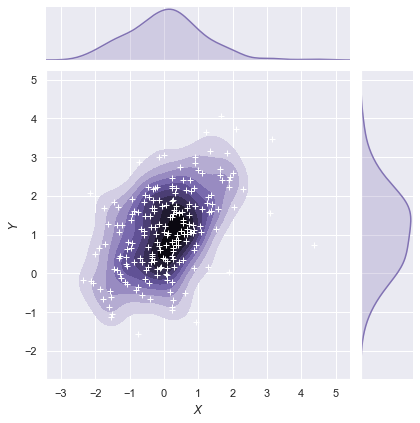

In [267]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## 4. Visualizing Linear Relationships

sns.regplot() is the axes-level plot, sns.lmplot() is the graphical level plot.

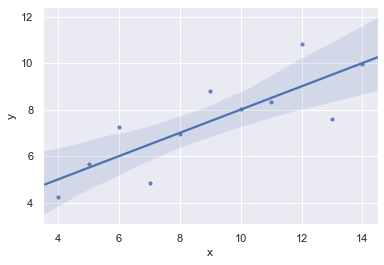

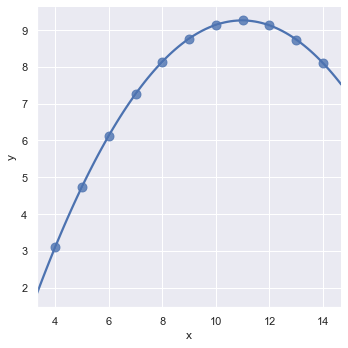

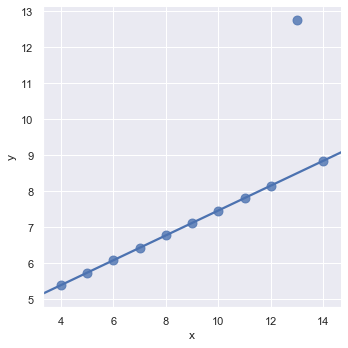

In [294]:
# Notice the scatter_kws={"s" : 10} is a matplotlib style function that specifies parameters.
anscombe = sns.load_dataset("anscombe")
anscombe.head(5)
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=95, scatter_kws={"s": 10});

# Notice in fitting other than simple linear models, CIs are not calculated. order=2 adds higher degree terms.
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=95, scatter_kws={"s": 80});
# Turning robust=True is acheived through giving points with large residuals relatively small weights in calculating loss.
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

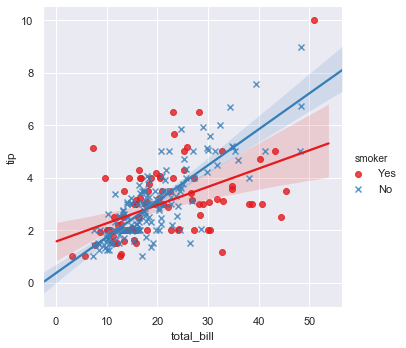

In [296]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

## 5. Multiple Plots

A demonstration of how to build plots from scratch.

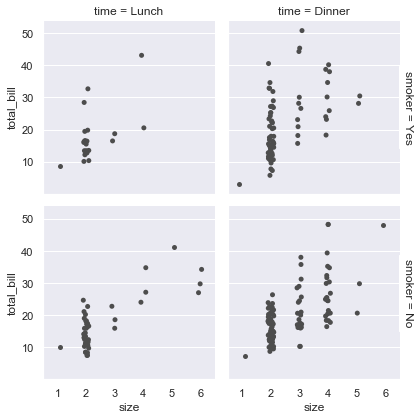

In [300]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.stripplot, "size", "total_bill", color=".3", jitter=True);

 __Sidenote: Is $[\hat{\mu} - \frac{2\hat{\sigma}}{\sqrt{n}}, \hat{\mu} + \frac{2\hat{\sigma}}{\sqrt{n}}]$ for mean__ ? 

- For a sample from normal distribution, does sample mean +- 2sd give you a 95% CI? __Yes__. If the sample is i.i.d.
- For a sample from any population, does it hold? __Yes__ if the sample size is large. Central limit theorem kicks in with large sample size and limited dependency between samples. In our example, quality of the CI improves quite fast as you increase the sample size.

We'll see from below that the <span style=color:red> estimate for standard deviation doesn't always get better as you increase the sample size </span>. There's some fluctuation in the estimation that you can't remove.<span style=color:red> But that fluctuation doesn't grow with sample size, so that uncertainty gets canceled by the $\sqrt{n}$ term asympototically </span> __as you estimate the mean__.

In [113]:
## Say sample is generated from a normal(0,400)
np.random.seed(500)

def ci_sample(sample):
    CI = []
    sample_mean = np.mean(sample)
    sample_sd = np.std(sample)
    CI.append(sample_mean - 2 * sample_sd / np.sqrt(sample.size))
    CI.append(sample_mean + 2 * sample_sd / np.sqrt(sample.size))
    return np.array(CI)



contains = []
cis = []
for i in range(1000):
    sample = np.random.normal(loc=0, scale=20, size=600)
    ci = ci_sample(sample)
    cis.append(ci)
    contain = [(ci[0] < 0) and (ci[1] > 0)]
    contains.append(contain)

np.array(contains).mean()

0.956

In [126]:
## Say sample is a SRS from range(1000)
np.random.seed(500)

def ci_sample(sample):
    CI = []
    sample_mean = np.mean(sample)
    sample_sd = np.std(sample)
    CI.append(sample_mean - 2 * sample_sd / np.sqrt(sample.size))
    CI.append(sample_mean + 2 * sample_sd / np.sqrt(sample.size))
    return np.array(CI)

mean = np.mean(np.arange(50000))

contains = []
cis = []
for i in range(1000):
    sample = np.random.choice(50000, size=50, replace=False)
    ci = ci_sample(sample)
    cis.append(ci)
    contain = [(ci[0] < mean) and (ci[1] > mean)]
    contains.append(contain)

np.array(contains).mean()
cis[:5]

0.947

[array([21966.46687511, 30723.73312489]),
 array([20954.69163344, 29586.74836656]),
 array([22663.26168338, 30407.93831662]),
 array([22052.00839429, 29471.35160571]),
 array([23542.08419312, 31157.27580688])]

### Side note: how well does sample std estimate population std?

The estimation doesn't get better with larger samples.

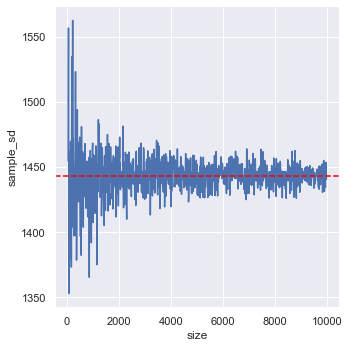

In [153]:
population = np.arange(5000)
mean = np.mean(population)
sd = np.std(population)
sizes = np.arange(50, 10000, 10)
sample_sds = []

for s in sizes:
    sample = np.random.choice(population, size=s)
    sample_sds.append(np.std(sample))

sample_sds = np.array(sample_sds)
result = pd.DataFrame({
    "size" : sizes,
    "sample_sd" : sample_sds
})

g = sns.relplot(data=result, x="size", y="sample_sd", kind="line", sort=True)
ax = g.ax
ax.axhline(sd, ls='--', color="red")